In [55]:
import numpy as np
import matplotlib.mlab as mlab
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import os

In [56]:
#this experiment did not create well defined clusters

In [57]:
#load .csv files into a pandas dataframes
df = pd.read_csv(".//agg_user_reviews.csv", header=None, names = ['userid', 'total_helpful_votes', 'avg_helpfulness', 'avg_rating'])

In [58]:
#These columns were dropped as they are not being used for k-means
df.drop('userid', axis=1, inplace = True)
df.drop('total_helpful_votes', axis=1, inplace = True)
print(df)

          avg_helpfulness  avg_rating
0                0.000000    5.000000
1                0.000000    5.000000
2                0.000000    3.750000
3                0.000000    5.000000
4                0.500000    3.500000
...                   ...         ...
21128800         0.703333    3.666666
21128801         0.750000    2.000000
21128802         1.000000    5.000000
21128803         0.770000    5.000000
21128804         0.500000    1.000000

[21128805 rows x 2 columns]


In [59]:
#converts the pandas dataframe to a numpy array that can be used with the KMeans() 
X = df.values

In [60]:
#set number of clusters
num_clusters = 3

#creates a list a number of 0 entries based on the number of clusters
clusters = [0] * num_clusters
print(clusters)

[0, 0, 0]


In [61]:
kmeans = KMeans(n_clusters=num_clusters).fit(X)

In [62]:
print (kmeans.cluster_centers_)

[[0.35746204 1.44099601]
 [0.33347412 4.89293864]
 [0.31045773 3.6612691 ]]


In [63]:
#This for loop counts the labels to get the size of each cluster.
for i in kmeans.labels_:
    clusters[i] = clusters[i] + 1

In [64]:
df['labels'] = kmeans.labels_

#The sample function is used to take a random sample of a dataframe.
df2 = df.sample(frac=0.0001)

print(df2)

          avg_helpfulness  avg_rating  labels
123821           0.620000    5.000000       1
11289018         0.333333    3.333333       2
12277434         0.500000    4.800000       1
5824709          0.000000    4.000000       2
12871838         0.000000    5.000000       1
...                   ...         ...     ...
9634729          0.000000    4.000000       2
11115244         0.000000    2.000000       0
2397061          0.500000    2.000000       0
19075075         0.000000    5.000000       1
19422594         0.000000    4.000000       2

[2113 rows x 3 columns]


In [65]:
X2 = df2.values

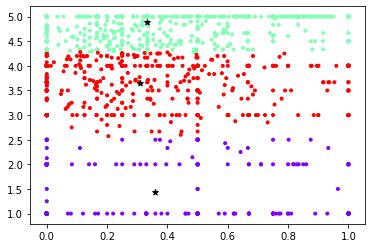

In [66]:
#creates a scatter plot for the kmeans clustering 
plt.scatter(X2[:,0],X2[:,1], c = X2[:,2], marker='.',cmap ='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='*', color='black') 
plt.show()